In [3]:
from tensorflow.keras.models import Sequential

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.datasets import fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

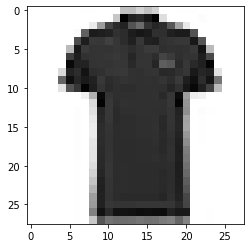

In [11]:
s1 = X_train[745,:, :]
plt.imshow(s1, cmap = 'Greys')

In [12]:
print(s1.max(), s1.min())

255 0


In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train, dtype = 'uint8')
y_test = to_categorical(y_test, dtype = 'uint8')

In [15]:
y_test.shape

(10000, 10)

In [16]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten



mymodel = Sequential()
mymodel.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Flatten())
mymodel.add(Dense(52, activation='relu'))
mymodel.add(Dense(46, activation='relu'))
mymodel.add(Dense(10,activation='softmax'))
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 52)                562484    
                                                                 
 dense_1 (Dense)             (None, 46)                2438      
                                                                 
 dense_2 (Dense)             (None, 10)                470       
                                                        

In [22]:
mymodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
hist = mymodel.fit(x = X_train, y = y_train, batch_size=16, validation_data=(X_test,y_test), epochs=20,verbose=1,)

Epoch 1/20
3750/3750 [==============================] - 56s 15ms/step - loss: 0.3898 - accuracy: 0.8599 - val_loss: 0.3158 - val_accuracy: 0.8885
Epoch 2/20
3750/3750 [==============================] - 55s 15ms/step - loss: 0.2644 - accuracy: 0.9033 - val_loss: 0.2936 - val_accuracy: 0.8933
Epoch 3/20
3750/3750 [==============================] - 55s 15ms/step - loss: 0.2201 - accuracy: 0.9187 - val_loss: 0.2584 - val_accuracy: 0.9080
Epoch 4/20
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1895 - accuracy: 0.9298 - val_loss: 0.2829 - val_accuracy: 0.9034
Epoch 5/20
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1635 - accuracy: 0.9390 - val_loss: 0.2688 - val_accuracy: 0.9094
Epoch 6/20
3750/3750 [==============================] - 56s 15ms/step - loss: 0.1396 - accuracy: 0.9481 - val_loss: 0.2876 - val_accuracy: 0.9067
Epoch 7/20
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1236 - accuracy: 0.9531 - val_loss: 0.3076 -